### The number of PhD student in Germany Analysis using Python

#### RSE Summer 2024 Self-Project # 1.

The Project will tackle the following questions regarding the number of PhD students in Germany. 
- How do the number of students change over the last 4 years? 
- How does this change based on nationality, gender and type of courses?


#### Why this topic?
Being a Masters in Data Science student myself, I was interested in the statistics of higher education students. Analysing this data will provide us with several insighs which we can use to dive deeper and research questions such as:
- Which courses do foreigners usually opt for and how to market them better.   
- Which courses are male/female dominant.
- Why are some courses more popular than the others? Do we need better marketing? or is it a language barrier issue?


#### Let's Talk about Data
The Dataset is from [Genesis,](https://www-genesis.destatis.de/genesis/online) a statistical data service provided by the German government. Dataset used is GENESIS-Tabelle: 21352-0003, Statistics of doctoral students.
I have created 2 csv for this: The first has course groups only while the 2nd has all the courses. 
- Data is recorded from 2019 - 2022. 
- Main header has Year, Course Group/ Course, German, Foreigner and Total Columns. Where German, Foreigner and Total refer to the number of students.
- 2nd header has Male and Female column for the German, Foreigner and Total Columns. 
 

#### Let's start

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Important modification required to work with downloaded CSV:


- Delimeter is ; instead of , as it is generally in other CSV's
- We need to remove extra information and copyrights to fetch tabular data directly from the CSV.
- Data has 2 heading rows, so we can change column names and merge them.
- Delete row 0 to remove 2nd heading row since we no longer require extra headings.

In [16]:
df = pd.read_csv('../data/21352-0003_$F_courses.csv', delimiter=';', encoding="utf-8")
df

,Unnamed: 0,Unnamed: 1,Germans,Germans.1,Germans.2,Foreigners,Foreigners.1,Foreigners.2,Total,Total.1,Total.2
0,NaN,NaN,Male,Female,Total,Male,Female,Total,Male,Female,Total
1,2019-12-01,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,Sports,494,405,899,96,53,149,590,458,1048
3,2019-12-01,"Law, Business and Economics, Social Sciences",13342,12366,25708,2532,2753,5285,15874,15119,30993
4,2019-12-01,"Mathematics, Natural Sciences",18662,12316,30978,6786,5977,12763,25448,18293,43741
5,2019-12-01,Human Medicine/Health Science,13286,21538,34824,2793,3432,6225,16079,24970,41049
6,2019-12-01,"Agricultural, Forest a.Nutr. Sciences,Veterin....",1250,2649,3899,696,722,1418,1946,3371,5317
7,2019-12-01,Engineering Sciences,19866,4478,24344,6390,2520,8910,26256,6998,33254
8,2019-12-01,"Art, Art Theory",1072,2031,3103,273,491,764,1345,2522,3867
9,2020-12-01,Humanities,6669,8517,15186,2540,3128,5668,9209,11645,20854


Changing column names and editing rows

In [17]:
df.columns = ["Year", "Course Group", "Germans_Male", "Germans_Female", "Germans_Total", "Foreigners_Male","Foreigners_Female","Foreigners_Total","Total_Male","Total_Female","Total_Total",]
df.drop(0, inplace=True)
df

,Year,Course Group,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,2019-12-01,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,Sports,494,405,899,96,53,149,590,458,1048
3,2019-12-01,"Law, Business and Economics, Social Sciences",13342,12366,25708,2532,2753,5285,15874,15119,30993
4,2019-12-01,"Mathematics, Natural Sciences",18662,12316,30978,6786,5977,12763,25448,18293,43741
5,2019-12-01,Human Medicine/Health Science,13286,21538,34824,2793,3432,6225,16079,24970,41049
6,2019-12-01,"Agricultural, Forest a.Nutr. Sciences,Veterin....",1250,2649,3899,696,722,1418,1946,3371,5317
7,2019-12-01,Engineering Sciences,19866,4478,24344,6390,2520,8910,26256,6998,33254
8,2019-12-01,"Art, Art Theory",1072,2031,3103,273,491,764,1345,2522,3867
9,2020-12-01,Humanities,6669,8517,15186,2540,3128,5668,9209,11645,20854
10,2020-12-01,Sports,512,449,961,96,58,154,608,507,1115


Changing data types of numeric columns to int

In [18]:
df = df.astype({'Germans_Male':int, 'Germans_Female':int,
       'Germans_Total':int, 'Foreigners_Male':int, 'Foreigners_Female':int,
       'Foreigners_Total':int, 'Total_Male':int, 'Total_Female':int, 'Total_Total':int})
df

,Year,Course Group,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,2019-12-01,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,Sports,494,405,899,96,53,149,590,458,1048
3,2019-12-01,"Law, Business and Economics, Social Sciences",13342,12366,25708,2532,2753,5285,15874,15119,30993
4,2019-12-01,"Mathematics, Natural Sciences",18662,12316,30978,6786,5977,12763,25448,18293,43741
5,2019-12-01,Human Medicine/Health Science,13286,21538,34824,2793,3432,6225,16079,24970,41049
6,2019-12-01,"Agricultural, Forest a.Nutr. Sciences,Veterin....",1250,2649,3899,696,722,1418,1946,3371,5317
7,2019-12-01,Engineering Sciences,19866,4478,24344,6390,2520,8910,26256,6998,33254
8,2019-12-01,"Art, Art Theory",1072,2031,3103,273,491,764,1345,2522,3867
9,2020-12-01,Humanities,6669,8517,15186,2540,3128,5668,9209,11645,20854
10,2020-12-01,Sports,512,449,961,96,58,154,608,507,1115


In [19]:
df.dtypes

Year                 object
Course Group         object
Germans_Male          int32
Germans_Female        int32
Germans_Total         int32
Foreigners_Male       int32
Foreigners_Female     int32
Foreigners_Total      int32
Total_Male            int32
Total_Female          int32
Total_Total           int32
dtype: object

#### Let's focus on number of students according to Year

I have removed Course Group since we need to group data and keeping Course Group column means extra rows.  

In [20]:
df_year = df.drop(['Course Group'], axis='columns')
df_year

,Year,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,2019-12-01,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,494,405,899,96,53,149,590,458,1048
3,2019-12-01,13342,12366,25708,2532,2753,5285,15874,15119,30993
4,2019-12-01,18662,12316,30978,6786,5977,12763,25448,18293,43741
5,2019-12-01,13286,21538,34824,2793,3432,6225,16079,24970,41049
6,2019-12-01,1250,2649,3899,696,722,1418,1946,3371,5317
7,2019-12-01,19866,4478,24344,6390,2520,8910,26256,6998,33254
8,2019-12-01,1072,2031,3103,273,491,764,1345,2522,3867
9,2020-12-01,6669,8517,15186,2540,3128,5668,9209,11645,20854
10,2020-12-01,512,449,961,96,58,154,608,507,1115


This groups data per Year and sums up their numbers. 

In [21]:
df_year = df_year.groupby('Year').sum().reset_index()
df_year

,Year,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
0,2019-12-01,74896,64594,139490,22225,19299,41524,97121,83893,181014
1,2020-12-01,77819,68216,146035,22222,19762,41984,100041,87978,188019
2,2021-12-01,81126,73225,154351,23814,21696,45510,104940,94921,199861
3,2022-12-01,81713,75363,157076,25027,22944,47971,106740,98307,205047


<Axes: title={'center': 'Number of Students according to Year and Nationality'}, ylabel='Year'>

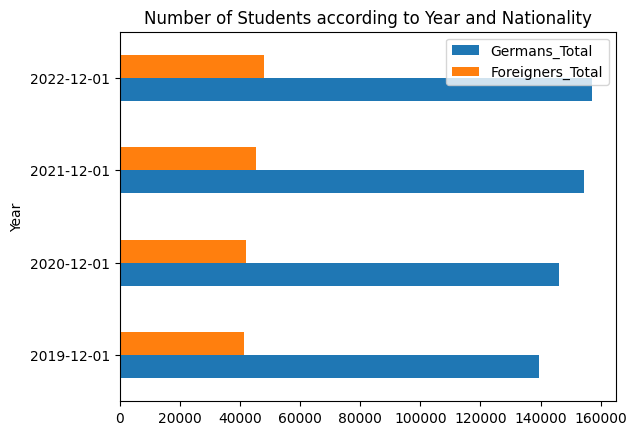

In [22]:
df_year.plot.barh(x='Year',y=['Germans_Total', 'Foreigners_Total'] , stacked=False, title='Number of Students according to Year and Nationality')

#### Insights: 
- Number of German students is always around 3x Foreigner students. 
- Number of both are steadily increasing through the years. 
- If we want more foreigner students, we need to look into what might be restricting them from applying and why their number is not increasing at a faster rate.

<Axes: title={'center': 'Number of Students according to Year and Nationality'}, ylabel='Year'>

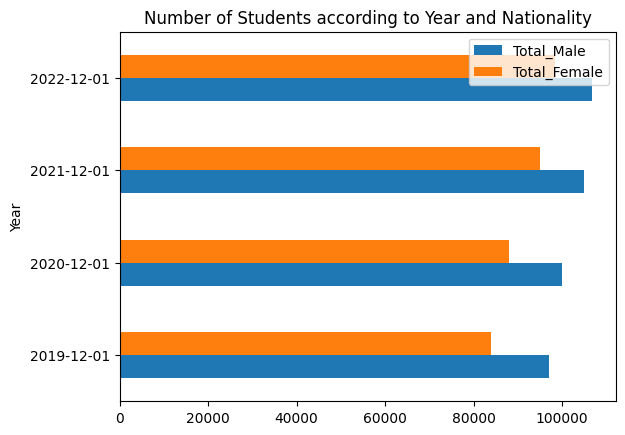

In [23]:
df_year.plot.barh(x='Year',y=['Total_Male', 'Total_Female'] , stacked=False, title='Number of Students according to Year and Nationality')

#### Insights: 
- Number of Male students is rougly the same as Female students. 
- Number of both are steadily increasing through the years. Female students seem to be catching up to Male numbers

#### Let's focus on number of students according to Course Groups

In [24]:
df_course_group = df.drop(['Year'], axis='columns')
df_course_group

,Course Group,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,Sports,494,405,899,96,53,149,590,458,1048
3,"Law, Business and Economics, Social Sciences",13342,12366,25708,2532,2753,5285,15874,15119,30993
4,"Mathematics, Natural Sciences",18662,12316,30978,6786,5977,12763,25448,18293,43741
5,Human Medicine/Health Science,13286,21538,34824,2793,3432,6225,16079,24970,41049
6,"Agricultural, Forest a.Nutr. Sciences,Veterin....",1250,2649,3899,696,722,1418,1946,3371,5317
7,Engineering Sciences,19866,4478,24344,6390,2520,8910,26256,6998,33254
8,"Art, Art Theory",1072,2031,3103,273,491,764,1345,2522,3867
9,Humanities,6669,8517,15186,2540,3128,5668,9209,11645,20854
10,Sports,512,449,961,96,58,154,608,507,1115


In [25]:
df_course_group = df_course_group.groupby('Course Group').sum().reset_index()
df_course_group

,Course Group,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
0,"Agricultural, Forest a.Nutr. Sciences,Veterin....",5081,10775,15856,2826,3054,5880,7907,13829,21736
1,"Art, Art Theory",4103,8119,12222,1045,1961,3006,5148,10080,15228
2,Engineering Sciences,83473,19361,102834,26938,11026,37964,110411,30387,140798
3,Human Medicine/Health Science,62198,102163,164361,12526,16182,28708,74724,118345,193069
4,Humanities,27132,34781,61913,10655,13296,23951,37787,48077,85864
5,"Law, Business and Economics, Social Sciences",56298,53209,109507,9650,11031,20681,65948,64240,130188
6,"Mathematics, Natural Sciences",75193,51180,126373,29240,26893,56133,104433,78073,182506
7,Sports,2076,1810,3886,408,258,666,2484,2068,4552


<Axes: title={'center': 'Number of Students according to Course Groups and Nationality'}, ylabel='Course Group'>

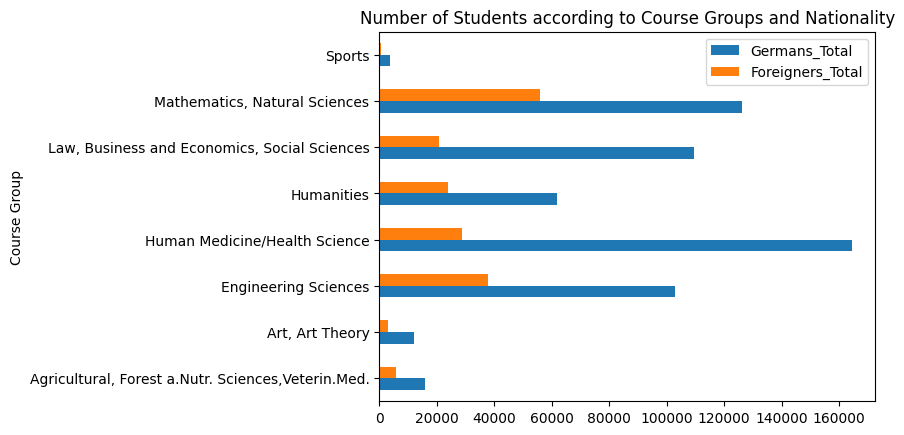

In [26]:
df_course_group.plot.barh(x='Course Group',y=['Germans_Total', 'Foreigners_Total'] , stacked=False, title='Number of Students according to Course Groups and Nationality')

#### Insights: 
- Number of students is very high in Human Medicine/ Health Science and Mathematics/ Natural Sciences compared to others.
- In all course groups, the number of german students is much higher than foreigners. 
- We can look into how to attract more foreigners.
- Groups like Sports and Art have relatively very low number.

<Axes: title={'center': 'Number of Students according to Course Groups and Gender'}, ylabel='Course Group'>

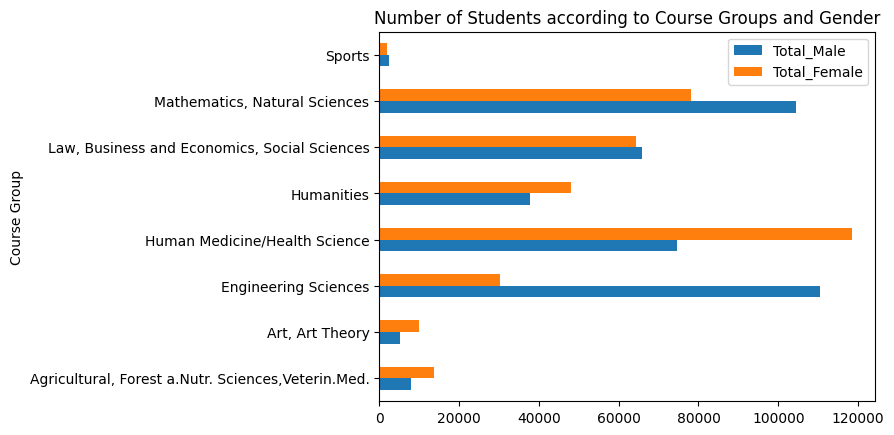

In [27]:
df_course_group.plot.barh(x='Course Group',y=['Total_Male', 'Total_Female'] , stacked=False, title='Number of Students according to Course Groups and Gender')

#### Insights: 
- Number of male students is aroudn 4x than female in engineering sciences, however number of female is higher in Human Medicine/ Health Science and Humanities.  
- We can dive into why there are more female/ male students in 1 group and not the others. 

#### Let's focus on top 10 courses for germans and internationals

For this I use the 2nd CSV and dive deeper into specific courses rather than course groups to provide more insights

In [28]:
df_extended = pd.read_csv('../data/21352-0003_$F_extended.csv', delimiter=';', encoding="utf-8")
df_extended

,Unnamed: 0,Unnamed: 1,Germans,Germans.1,Germans.2,Foreigners,Foreigners.1,Foreigners.2,Total,Total.1,Total.2
0,NaN,NaN,Male,Female,Total,Male,Female,Total,Male,Female,Total
1,2019-12-01,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,"Humanities, general",351,558,909,112,222,334,463,780,1243
3,2019-12-01,"Protestant Theology, Protes. Religious Educa...",456,428,884,140,56,196,596,484,1080
4,2019-12-01,"Catholic Theology, Catholic Religious Education",457,358,815,207,47,254,664,405,1069
...,...,...,...,...,...,...,...,...,...,...,...
276,2022-12-01,Fine Arts,29,41,70,12,20,32,41,61,102
277,2022-12-01,Design,72,86,158,19,23,42,91,109,200
278,2022-12-01,"Perform. Arts, Film and Telev.Stud., Theatre...",108,173,281,34,60,94,142,233,375
279,2022-12-01,"Music, Musicology",446,430,876,134,149,283,580,579,1159


In [29]:
df_extended.columns = ["Year", "Course", "Germans_Male", "Germans_Female", "Germans_Total", "Foreigners_Male","Foreigners_Female","Foreigners_Total","Total_Male","Total_Female","Total_Total",]
df_extended.drop(0, inplace=True)
df_extended

,Year,Course,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,2019-12-01,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,"Humanities, general",351,558,909,112,222,334,463,780,1243
3,2019-12-01,"Protestant Theology, Protes. Religious Educa...",456,428,884,140,56,196,596,484,1080
4,2019-12-01,"Catholic Theology, Catholic Religious Education",457,358,815,207,47,254,664,405,1069
5,2019-12-01,Philosophy,950,684,1634,527,318,845,1477,1002,2479
...,...,...,...,...,...,...,...,...,...,...,...
276,2022-12-01,Fine Arts,29,41,70,12,20,32,41,61,102
277,2022-12-01,Design,72,86,158,19,23,42,91,109,200
278,2022-12-01,"Perform. Arts, Film and Telev.Stud., Theatre...",108,173,281,34,60,94,142,233,375
279,2022-12-01,"Music, Musicology",446,430,876,134,149,283,580,579,1159


We need to remove trailing whitespaces in courses.

In [30]:
df_extended['Course'] = df_extended['Course'].str.strip()

I noticed the following rows have missing values, since only 2 rows have this problem, I simply remove them.

In [31]:
df_extended.drop(17, inplace=True)
df_extended.drop(31, inplace=True)

In [32]:
df_extended = df_extended.astype({'Germans_Male':int, 'Germans_Female':int,
       'Germans_Total':int, 'Foreigners_Male':int, 'Foreigners_Female':int,
       'Foreigners_Total':int, 'Total_Male':int, 'Total_Female':int, 'Total_Total':int})
df_extended

,Year,Course,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,2019-12-01,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,2019-12-01,"Humanities, general",351,558,909,112,222,334,463,780,1243
3,2019-12-01,"Protestant Theology, Protes. Religious Education",456,428,884,140,56,196,596,484,1080
4,2019-12-01,"Catholic Theology, Catholic Religious Education",457,358,815,207,47,254,664,405,1069
5,2019-12-01,Philosophy,950,684,1634,527,318,845,1477,1002,2479
...,...,...,...,...,...,...,...,...,...,...,...
276,2022-12-01,Fine Arts,29,41,70,12,20,32,41,61,102
277,2022-12-01,Design,72,86,158,19,23,42,91,109,200
278,2022-12-01,"Perform. Arts, Film and Telev.Stud., Theatre S...",108,173,281,34,60,94,142,233,375
279,2022-12-01,"Music, Musicology",446,430,876,134,149,283,580,579,1159


In [33]:
df_extended.dtypes

Year                 object
Course               object
Germans_Male          int32
Germans_Female        int32
Germans_Total         int32
Foreigners_Male       int32
Foreigners_Female     int32
Foreigners_Total      int32
Total_Male            int32
Total_Female          int32
Total_Total           int32
dtype: object

#### Creating 2 dataframes focusing on type of Courses and Year respectively. 

In [34]:
df_extended_course_group = df_extended.drop(['Year'], axis='columns')
df_extended_course_group

,Course,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
1,Humanities,6924,8811,15735,2659,3351,6010,9583,12162,21745
2,"Humanities, general",351,558,909,112,222,334,463,780,1243
3,"Protestant Theology, Protes. Religious Education",456,428,884,140,56,196,596,484,1080
4,"Catholic Theology, Catholic Religious Education",457,358,815,207,47,254,664,405,1069
5,Philosophy,950,684,1634,527,318,845,1477,1002,2479
...,...,...,...,...,...,...,...,...,...,...
276,Fine Arts,29,41,70,12,20,32,41,61,102
277,Design,72,86,158,19,23,42,91,109,200
278,"Perform. Arts, Film and Telev.Stud., Theatre S...",108,173,281,34,60,94,142,233,375
279,"Music, Musicology",446,430,876,134,149,283,580,579,1159


In [35]:
df_extended_course_group = df_extended_course_group.groupby('Course').sum().reset_index()
df_extended_course_group

,Course,Germans_Male,Germans_Female,Germans_Total,Foreigners_Male,Foreigners_Female,Foreigners_Total,Total_Male,Total_Female,Total_Total
0,Administrative Sciences,118,65,183,65,35,100,183,100,283
1,"Agricult. Sciences, Food and Beverage Technology",2550,2914,5464,1871,1815,3686,4421,4729,9150
2,"Agricultural, Forest a.Nutr. Sciences,Veterin....",5081,10775,15856,2826,3054,5880,7907,13829,21736
3,Applied Social Science,303,627,930,26,84,110,329,711,1040
4,"Architecture, Interior Architecture",1328,1281,2609,642,659,1301,1970,1940,3910
...,...,...,...,...,...,...,...,...,...,...
65,Spatial Planning,661,707,1368,658,676,1334,1319,1383,2702
66,Sports,2076,1810,3886,408,258,666,2484,2068,4552
67,Surveying,657,217,874,398,176,574,1055,393,1448
68,"Traffic Engineering, Nautical Science",2569,415,2984,457,155,612,3026,570,3596


#### Extracting relevant columns for ease of use.

In [36]:
df_extended_course_group_top = df_extended_course_group[["Course", 'Germans_Total', 'Foreigners_Total']]
df_extended_course_group_top

,Course,Germans_Total,Foreigners_Total
0,Administrative Sciences,183,100
1,"Agricult. Sciences, Food and Beverage Technology",5464,3686
2,"Agricultural, Forest a.Nutr. Sciences,Veterin....",15856,5880
3,Applied Social Science,930,110
4,"Architecture, Interior Architecture",2609,1301
...,...,...,...
65,Spatial Planning,1368,1334
66,Sports,3886,666
67,Surveying,874,574
68,"Traffic Engineering, Nautical Science",2984,612


#### Fetching top 10 courses. We can edit this as required. 

In [37]:
top_10_values_foreign = df_extended_course_group_top['Foreigners_Total'].nlargest(n=10)
top_10_values_german = df_extended_course_group_top['Germans_Total'].nlargest(n=10)

In [38]:
top_10_rows_foreign = df_extended_course_group_top[df_extended_course_group_top['Foreigners_Total'].isin(top_10_values_foreign)]
top_10_rows_foreign

,Course,Germans_Total,Foreigners_Total
7,Biology,33962,19899
12,Chemistry,37246,12476
16,Computer Science,22647,9887
22,Engineering Sciences,102834,37964
33,Human Medicine (excluding dentistry),143467,25706
34,Human Medicine/Health Science,164361,28708
35,Humanities,61913,23951
41,"Law, Business and Economics, Social Sciences",109507,20681
45,"Mathematics, Natural Sciences",126373,56133
57,"Physics, Astronomy",25564,12207


In [39]:
top_10_rows_german= df_extended_course_group_top[df_extended_course_group_top['Germans_Total'].isin(top_10_values_german)]
top_10_rows_german

,Course,Germans_Total,Foreigners_Total
7,Biology,33962,19899
12,Chemistry,37246,12476
22,Engineering Sciences,102834,37964
33,Human Medicine (excluding dentistry),143467,25706
34,Human Medicine/Health Science,164361,28708
35,Humanities,61913,23951
40,Law,32148,5329
41,"Law, Business and Economics, Social Sciences",109507,20681
45,"Mathematics, Natural Sciences",126373,56133
47,Mechnical Engineering/Process Engineering,38475,9544


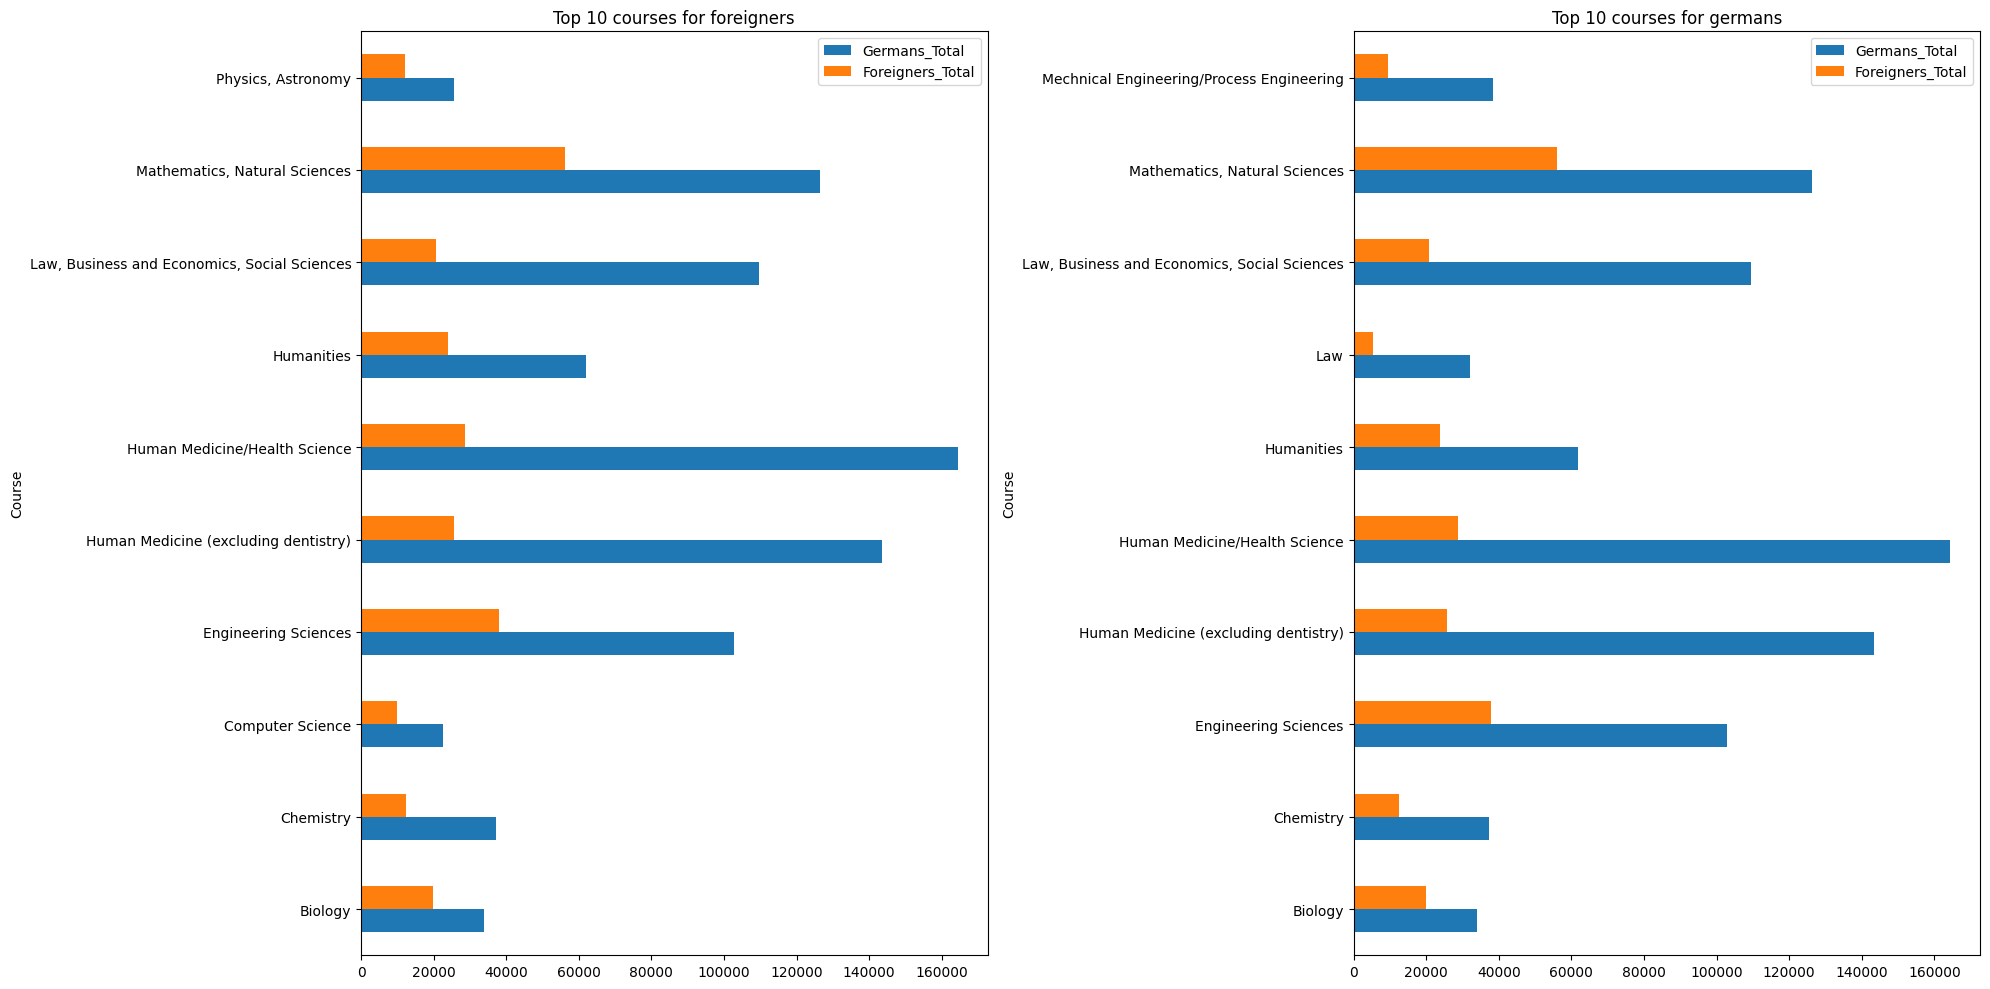

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

axes = axes.flatten()
top_10_rows_foreign.plot.barh(x='Course' , stacked=False, title='Top 10 courses for foreigners', ax=axes[0])
top_10_rows_german.plot.barh(x='Course' , stacked=False, title='Top 10 courses for germans', ax=axes[1])

plt.tight_layout()

#### Insights: 
- We can see most of their top 10 is the same. However, their rank is a little different. This shows their interest is similar at the moment. 
- We can use this to target more students and market courses accordingly.